In [1]:
%%capture
%load_ext autoreload
%autoreload 2
from setup_nb_env import *

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### <font color=blue> Some data statistics.

In [26]:
from epsampling.utils import load_latest_csv

data_dir = '/work/users/k/4/k4thryn/Repos/EpSampling/data/'
_df,name = load_csv('merged_covs_deaths',f'{data_dir}processed/',timestamp='20240920-125607')


# fname = 'merged_covs_deaths_20240920-125607.csv'
# _df = pd.read_csv(f'{data_dir}processed/{fname}')


# _df.drop('Postal',axis=1,inplace=True)
# _df.rename({'COVIDhubEns_state_deaths':'State_deaths_ens','True_county_deaths':'Deaths_true',
#            'Naive_county_deaths':'Deaths_naive'},axis=1,inplace=True)

# display(_df)
# print('\n','Num samples:',len(_df),'\n',
#       'Num dates:',_df.Date.nunique(),'\n',
#       'Num counties:',_df.Fips.nunique(),'\n')

# acs_covs = df.columns[10:]
# death_covs = df.columns[:10]

# df_acs = df[acs_covs]
# df_deaths = df[death_covs]

In [4]:
_df.drop('Postal',axis=1,inplace=True)
# _df.rename({'COVIDhubEns_state_deaths':'State_deaths_ens','True_county_deaths':'Deaths_true',
#            'Naive_county_deaths':'Deaths_naive'},axis=1,inplace=True)

In [5]:
_df.rename({'COVIDhubEns_state_deaths':'State_deaths_ens','True_county_deaths':'Deaths_true',
           'Naive_county_deaths':'Deaths_naive'},axis=1,inplace=True)

In [9]:
_df

,State_fips,State,County,Fips,Date,State_deaths_ens,Pop,Pop_ratio,Deaths_true,Deaths_naive,...,HU_x15,HU_UIS01D,HU_UIS01A,HU_UIS02,HU_UIS0304,HU_UIS0509,HU_UIS1019,HU_UIS2049,HU_UIS50P,HU_UISOTHER
0,41,OR,Baker,41001,2020-05-09,125.655,16124,0.004,0.000,0.480,...,8654,6300,109,162,159,183,105,90,157,1389
1,41,OR,Baker,41001,2020-05-16,143.950,16124,0.004,0.000,0.550,...,8654,6300,109,162,159,183,105,90,157,1389
2,41,OR,Baker,41001,2020-05-23,150.378,16124,0.004,0.000,0.575,...,8654,6300,109,162,159,183,105,90,157,1389
3,41,OR,Baker,41001,2020-05-30,159.093,16124,0.004,0.000,0.608,...,8654,6300,109,162,159,183,105,90,157,1389
4,41,OR,Baker,41001,2020-06-06,164.199,16124,0.004,0.000,0.628,...,8654,6300,109,162,159,183,105,90,157,1389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332432,24,MD,Baltimore city,24510,2022-04-09,14367.000,593490,0.098,1765.000,1410.374,...,293718,43042,149324,14615,16871,17300,12674,7999,31436,457
332433,24,MD,Baltimore city,24510,2022-04-16,14391.000,593490,0.098,1771.000,1412.730,...,293718,43042,149324,14615,16871,17300,12674,7999,31436,457
332434,24,MD,Baltimore city,24510,2022-04-23,14423.000,593490,0.098,1771.000,1415.872,...,293718,43042,149324,14615,16871,17300,12674,7999,31436,457
332435,24,MD,Baltimore city,24510,2022-04-30,14443.000,593490,0.098,1773.000,1417.835,...,293718,43042,149324,14615,16871,17300,12674,7999,31436,457


In [6]:
# from datetime import datetime

df_deaths = _df[['State_fips', 'State', 'County', 'Fips', 'Date', 'State_deaths_ens',
       'Pop', 'Pop_ratio', 'Deaths_true', 'Deaths_naive']]
# # df_deaths

# d = datetime.today().strftime('%Y%m%d-%H%M%S')
# df_deaths.to_csv(f'{data_dir}/processed/df_deaths_{d}.csv',index=False)

In [ ]:
# df_deaths = load_latest_csv('df_deaths',f'{data_dir}/processed/')
# df_deaths

In [8]:
from epsampling.utils import get_performance

y_naive = df_deaths['Deaths_naive'].values
# y_test = df_deaths['Deaths_true'].values

y_test = df_deaths['Deaths_t'].values

model_names = ['Deaths_naive'] #,'Deaths_true']
model_preds = [y_naive]

metrics_dict = get_performance(model_names, model_preds, y_test, y_naive)
metrics_dict

{'Deaths_naive': {'MAE': 45.12020251173903,
  'MSE': 32283.266378723525,
  'r2': 0.9174753744784435,
  'relMAE': 1.0}}

In [12]:
df_deaths

,State_fips,State,County,Fips,Date,State_deaths_ens,Pop,Pop_ratio,Deaths_true,Deaths_naive
0,41,OR,Baker,41001,2020-05-09,125.655,16124,0.004,0.000,0.480
1,41,OR,Baker,41001,2020-05-16,143.950,16124,0.004,0.000,0.550
2,41,OR,Baker,41001,2020-05-23,150.378,16124,0.004,0.000,0.575
3,41,OR,Baker,41001,2020-05-30,159.093,16124,0.004,0.000,0.608
4,41,OR,Baker,41001,2020-06-06,164.199,16124,0.004,0.000,0.628
...,...,...,...,...,...,...,...,...,...,...
332432,24,MD,Baltimore city,24510,2022-04-09,14367.000,593490,0.098,1765.000,1410.374
332433,24,MD,Baltimore city,24510,2022-04-16,14391.000,593490,0.098,1771.000,1412.730
332434,24,MD,Baltimore city,24510,2022-04-23,14423.000,593490,0.098,1771.000,1415.872
332435,24,MD,Baltimore city,24510,2022-04-30,14443.000,593490,0.098,1773.000,1417.835


### <font color=blue> Do naive metrics vary a lot among counties?

In [13]:
from epsampling.utils import get_performance
import pprint

county_res_dict = {}

fipss = df_deaths.Fips.unique()

for fips in tqdm(df_deaths.Fips.unique(), total = len(fipss)):
    
    df_fips = df_deaths[df_deaths.Fips==fips]
    
    y_naive = df_fips['Deaths_naive'].values
    y_test = df_fips['Deaths_true'].values

    model_names = ['Deaths_naive'] #,'Deaths_true']
    model_preds = [y_naive]
    
    metrics_dict = get_performance(model_names, model_preds, y_test, y_naive)
    county_res_dict[fips] = list(metrics_dict.values())[0]
    
df_res = pd.DataFrame([[county,metric,value] 
                       for county,d in county_res_dict.items() 
                       for metric,value in d.items()], 
                       columns = ['Fips','metric','value'])

df = df_res.pivot(index='Fips',columns='metric',values='value')
df.drop('relMAE',axis=1,inplace=True)

df.reset_index(inplace=True)
df.columns.name = None
df.index.name = None
df

100%|██████████| 3130/3130 [00:04<00:00, 629.55it/s]


,Fips,MAE,MSE,r2
0,1001,13.563,280.602,0.933
1,1003,128.481,20883.311,0.612
2,1005,2.901,14.041,0.987
3,1007,11.664,184.186,0.854
4,1009,7.296,74.700,0.988
...,...,...,...,...
3125,56037,7.185,80.640,0.958
3126,56039,22.096,847.469,-25.826
3127,56041,10.802,183.194,-0.080
3128,56043,12.707,199.986,-0.045


In [14]:
print(f'\n\n* MAE * \nvariance: {round(df.MAE.var(),3)}\n',df.MAE.describe(),
      f'\n\n* MSE * \nvariance: {round(df.MSE.var(),3)}\n',df.MSE.describe(),
      f'\n\n* r2 * \nvariance: {round(df.r2.var(),3)}\n',df.r2.describe())



* MAE * 
variance: 23118.332
 count   3130.000
mean      44.816
std      152.047
min        0.047
25%        5.712
50%       13.800
75%       33.407
max     6164.556
Name: MAE, dtype: float64 

* MSE * 
variance: 717528509653.585
 count       3130.000
mean       32045.279
std       847070.546
min            0.003
25%           47.093
50%          274.031
75%         1543.020
max     46847206.763
Name: MSE, dtype: float64 

* r2 * 
variance: 232295.855
 count     3130.000
mean        -9.487
std        481.971
min     -26930.356
25%          0.259
50%          0.698
75%          0.879
max          0.997
Name: r2, dtype: float64


### <font color=blue> Check what's up with the negative r2.

In [15]:
bad_counties = df[df.r2 < -1.0 ]
# display(len(bad_counties), bad_counties)

dff = df_deaths[df_deaths.Fips==25007]

dff['Deaths_fixed'] = dff['Deaths_naive']
# dff['Deaths_fixed'] = 0
# dff['Deaths_fixed'] = 1

# # # # # # # # # # # # # # # 
y_naive = dff['Deaths_fixed'].values
# # # # # # # # # # # # # # # 

y_test = dff['Deaths_true'].values

model_names = ['Deaths_naive'] #,'Deaths_true']
model_preds = [y_naive]

metrics_dict = get_performance(model_names, model_preds, y_test, y_naive)
metrics_dict

{'Deaths_naive': {'MAE': 38.332043688633405,
  'MSE': 1646.6022241996295,
  'r2': -26930.355521230784,
  'relMAE': 1.0}}

In [16]:
dff

,State_fips,State,County,Fips,Date,State_deaths_ens,Pop,Pop_ratio,Deaths_true,Deaths_naive,Deaths_fixed
5200,25,MA,Dukes,25007,2020-04-18,1546.788,17332,0.003,0.000,3.890,3.890
5201,25,MA,Dukes,25007,2020-05-02,4041.351,17332,0.003,1.000,10.162,10.162
5202,25,MA,Dukes,25007,2020-05-09,4957.061,17332,0.003,1.000,12.465,12.465
5203,25,MA,Dukes,25007,2020-05-16,5780.674,17332,0.003,1.000,14.536,14.536
5204,25,MA,Dukes,25007,2020-05-23,6568.563,17332,0.003,1.000,16.517,16.517
5205,25,MA,Dukes,25007,2020-05-30,6852.666,17332,0.003,1.000,17.232,17.232
5206,25,MA,Dukes,25007,2020-06-06,7200.627,17332,0.003,1.000,18.107,18.107
5207,25,MA,Dukes,25007,2020-06-13,7617.986,17332,0.003,1.000,19.156,19.156
5208,25,MA,Dukes,25007,2020-06-20,7841.567,17332,0.003,0.000,19.719,19.719
5209,25,MA,Dukes,25007,2020-06-27,8026.631,17332,0.003,0.000,20.184,20.184


### <font color=blue> Only look at counties with positive r2.

In [17]:
import io 
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1) 

In [18]:
df_pop = df_deaths[['Fips','Pop','Pop_ratio']]
df_pop.drop_duplicates(inplace=True)
dff = df.merge(df_pop,on='Fips')
dff

,Fips,MAE,MSE,r2,Pop,Pop_ratio
0,1001,13.563,280.602,0.933,55869,0.011
1,1003,128.481,20883.311,0.612,223234,0.046
2,1005,2.901,14.041,0.987,24686,0.005
3,1007,11.664,184.186,0.854,22394,0.005
4,1009,7.296,74.700,0.988,57826,0.012
...,...,...,...,...,...,...
3125,56037,7.185,80.640,0.958,42343,0.073
3126,56039,22.096,847.469,-25.826,23464,0.041
3127,56041,10.802,183.194,-0.080,20226,0.035
3128,56043,12.707,199.986,-0.045,7805,0.013


In [19]:
## Only plot counties w r2 > 0

dff_good = dff[dff.r2 > 0]
dff_bad = dff[dff.r2 < 0]
len(dff), len(dff_good), len(dff_bad)

(3130, 2540, 576)

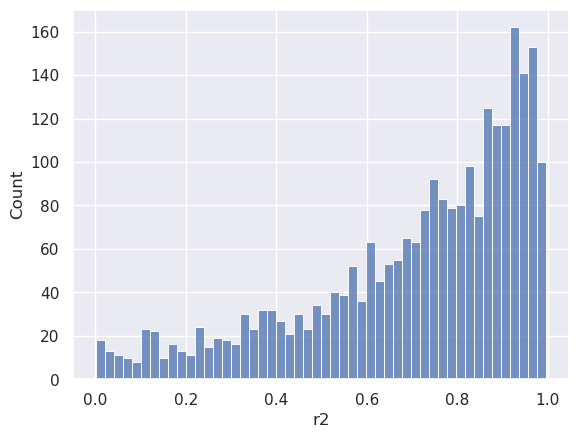

In [20]:
sns.histplot(data=dff_good, x='r2',bins=50)
plt.show()

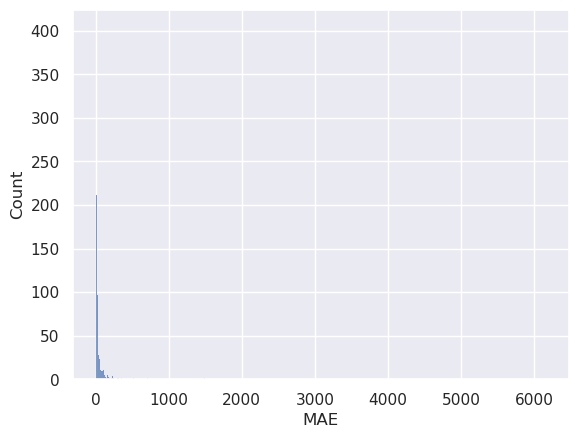

In [21]:
import matplotlib.pyplot as plt
sns.histplot(data=dff_good, x='MAE')
# sns.histplot()
plt.show()

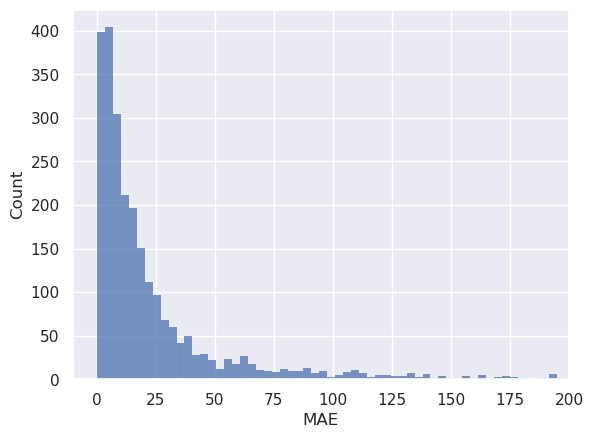

In [22]:
import matplotlib.pyplot as plt
sns.histplot(data=dff_good, x='MAE')
# sns.histplot()
plt.xlim(-10,200)
plt.show()

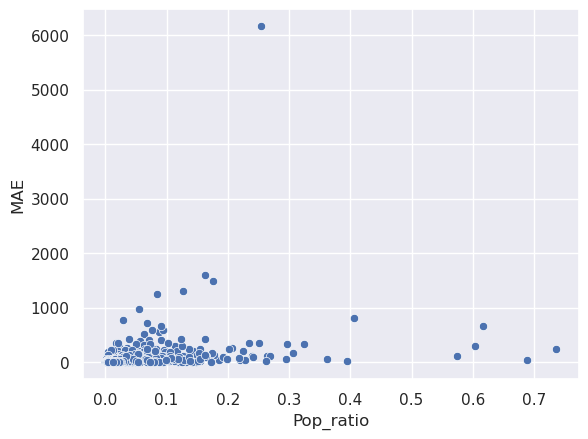

In [23]:
sns.scatterplot(data=dff_good, x="Pop_ratio", y="MAE")
plt.show()

<Axes: xlabel='Pop_ratio', ylabel='r2'>

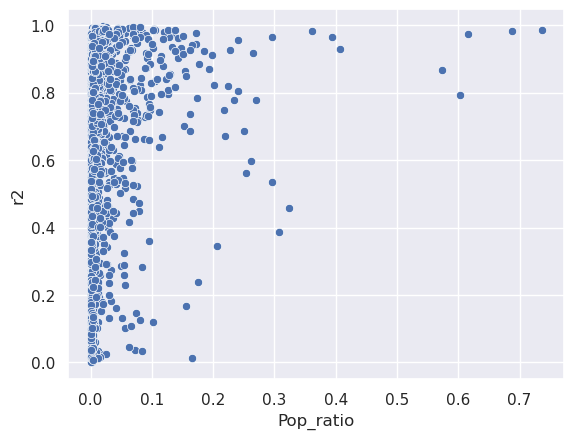

In [24]:
sns.scatterplot(data=dff_good, x="Pop_ratio", y="r2")

## <font color=magenta> Conclusion: Old one is still good. When evaluating naive prediction (against naive as the baseline), the relMAE is 1.0 which is correct.
    
timestamp='20240920-125607'
    
fname = 'merged_covs_deaths_20240920-125607.csv'
    
_df = pd.read_csv(f'{data_dir}processed/{fname}')

In [27]:
name

'/work/users/k/4/k4thryn/Repos/EpSampling/data/processed/merged_covs_deaths_20240920-125607.csv'